   brewery_id             brewery_name  ...  beer_abv  beer_beerid
0       10325          Vecchio Birraio  ...       5.0        47986
1       10325          Vecchio Birraio  ...       6.2        48213
2       10325          Vecchio Birraio  ...       6.5        48215
3       10325          Vecchio Birraio  ...       5.0        47969
4        1075  Caldera Brewing Company  ...       7.7        64883

[5 rows x 13 columns]
(1586614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-nul

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


American IPA                        113144
American Double / Imperial IPA       85105
American Pale Ale (APA)              58072
Russian Imperial Stout               53424
American Double / Imperial Stout     50137
                                     ...  
English Pale Mild Ale                  648
Faro                                   608
Roggenbier                             395
Happoshu                               237
Kvass                                  229
Name: beer_style, Length: 104, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 482420 entries, 1 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   brewery_id          482420 non-null  int64         
 1   brewery_name        482420 non-null  object        
 2   review_time         482420 non-null  datetime64[ns]
 3   review_overall      482420 non-null  float64       
 4   review_aroma        4824

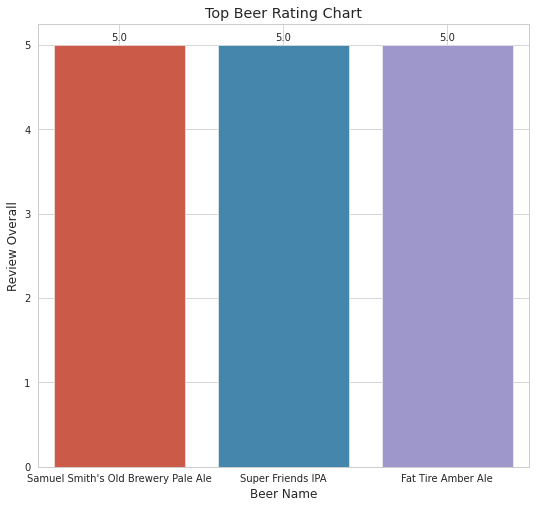

In [13]:
#import pandas package as alias pd
import pandas as pd

#import plot package for visualization graph
import seaborn as sns 

#use pandas '.read_csv()' module to read file as df
df=pd.read_csv('https://query.data.world/s/zhsp6ytp4wfqkqq3vdp2eo5fq255sk')

#print first 5 rows in the data frame df
print(df.head())

#shows the table dimensions
print(df.shape)

#shows data type and # the amount of missing values for each column
print(df.info())

#create new data frame (df_drop) remove all rows with missing data
df_drop=df.dropna()

#print info of the new dataframe
print(df_drop.info())

#cleaning up review data/time convert to seconds
df_drop['review_time']=pd.to_datetime(df_drop['review_time'],unit='s')

#print out new and updated data types and the column head
print(df_drop.dtypes)
print(df_drop['review_time'].head())

#show howm any unique variables are in the #column 'beer_style'
print(df_drop['beer_style'].unique())

#return number of variables in style column
print(df_drop['beer_style'].value_counts())

#seperate from original data frame
ale = df_drop[df_drop['beer_style'].str.contains('Ale')]
IPA = df_drop[df_drop['beer_style'].str.contains('IPA')]

#print info on both new data frames
print(ale.info())
print(IPA.info())

#create new data frame titled fav_beer and using pd.concat() to combine
fav_beer = pd.concat([ale, IPA])

#print info to see new data frame
print(fav_beer.info())

#use .duplicated() to show how many are duplicated
print(fav_beer.duplicated().value_counts())

#create clean  data frame and use .drop_duplicates() to remove 
fav_beer_clean = fav_beer.drop_duplicates()

#print out the info on the new data frame
print(fav_beer_clean.info())

#only show rows with 4 or higher review
fav_beer_clean = fav_beer_clean[fav_beer_clean['review_overall']>=4]

fav_beer_clean = fav_beer_clean[(fav_beer_clean['beer_abv']>=5.0)&(fav_beer_clean['beer_abv']<=6.0)]

#print value counts of different beers in the beer_name col
print(fav_beer_clean['beer_name'].value_counts())

#only show the top 20 most rated beers
print(fav_beer_clean['beer_name'].value_counts().head(20))

#create visual/bar chart for top 3 beers at a 5 rating
top5_alcohol = fav_beer_clean.sort_values('review_overall',
                              ascending=False)[:5].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(16,7))
fig.tight_layout(pad=2)

plt.subplot(1,2,1)
sns.set_style('whitegrid')
ax = sns.barplot(x='beer_name', y='review_overall',
                 data=top5_alcohol)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
plt.title('Top Beer Rating Chart')
plt.xlabel('Beer Name')
plt.ylabel('Review Overall')
ax.grid(True)

In [ ]:
#New_Colors = ['green','blue','purple','brown','teal']
#plt.scatter(fav_beer_clean['beer_name'], fav_beer_clean['review_overall'])
#plt.title('Top Beer Rating Chart', fontsize=14)
#plt.xlabel('Beer Name', fontsize=14)
#plt.xticks(rotation='vertical')
#plt.ylabel('Review Overall', fontsize=14)
#plt.grid(True)
#plt.show()

#df.plot(kind = 'bar', x = 'beer_name', y = 'review_overall')

#plt.show()
#x = ['beer_name']
#y = ['review_overall']

#x_pos = [i for i, _ in enumerate(x)]

#plt.bar(x_pos, beer, color='green')
#plt.xlabel("Beer Name")
#plt.ylabel("Overall Review")
#plt.title("Top Beer Rating Chart")

#plt.xticks(x_pos, x)

#plt.show()

#give user ability to add new beers to the list 
#new_list = []
#append elements to this list **** NEED TO RESEARCH MORE NOT SURE HOW THIS SHOULD WORK****
#new_beer = input("Add a new beer")
#new_list.append("new_beer")

#import pandas package pd
#import pandas as pd

# read CSV file
#results = pd.read_csv('https://query.data.world/s/zhsp6ytp4wfqkqq3vdp2eo5fq255sk')

# count no. of lines
#print("Number of lines present:", 
      #len(results))

#for loop
#import pandas as pd
#for filename in ['https://query.data.world/s/zhsp6ytp4wfqkqq3vdp2eo5fq255sk']:
#data = pd.read_csv(filename, index_col='beer_name')
#print(filename, data.min())

#review_overall = 4.0 #how can I pull this rating from the CSV file?*****
#if review_overall > 3:
#print('greater')
#else:
#print('not greater')
#print('done')